In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("/kaggle/input/bbc-fulltext-and-category/bbc-text.csv")

## EDA

In [3]:
df.sample(10)

,category,text
778,business,s korea spending boost to economy south korea ...
1381,tech,millions to miss out on the net by 2025 40% o...
1737,sport,campbell to be lions consultant former governm...
260,politics,ukip outspent labour on eu poll the uk indepen...
642,business,borussia dortmund near bust german football cl...
1333,tech,cebit opens to mobile music tune cebit the wo...
1578,business,golden rule boost for chancellor chancellor go...
651,entertainment,wife swap makers sue us copycat the british ...
903,tech,telewest to challenge sky plus cable firm tele...
1905,sport,murphy: that was a bruising battle that s what...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [6]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


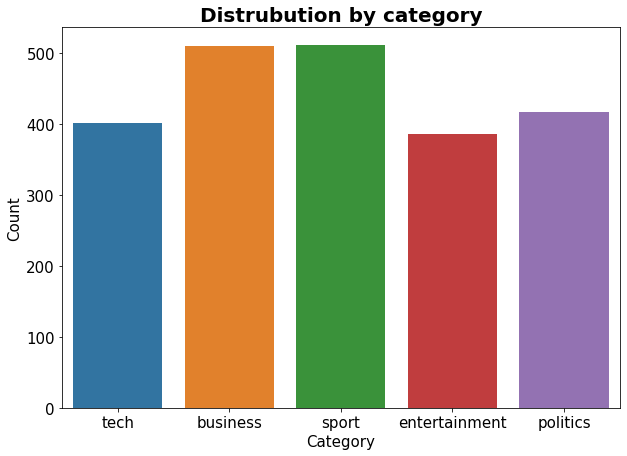

In [7]:
# plottng distribution by category
plt.figure(figsize=(10,7))
fig=sns.countplot(df['category'])
plt.title('Distrubution by category',
          fontweight ="bold",fontsize=20);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
fig.set_xlabel('Category',fontsize=15);
fig.set_ylabel('Count',fontsize=15);

## text feature extraction

In [8]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
train_feature=tfidf_vect.fit_transform(df['text'])

In [9]:
#Converting the data to 2D for plotting
pca = PCA(n_components=2)
data2D = pca.fit_transform(train_feature.toarray())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


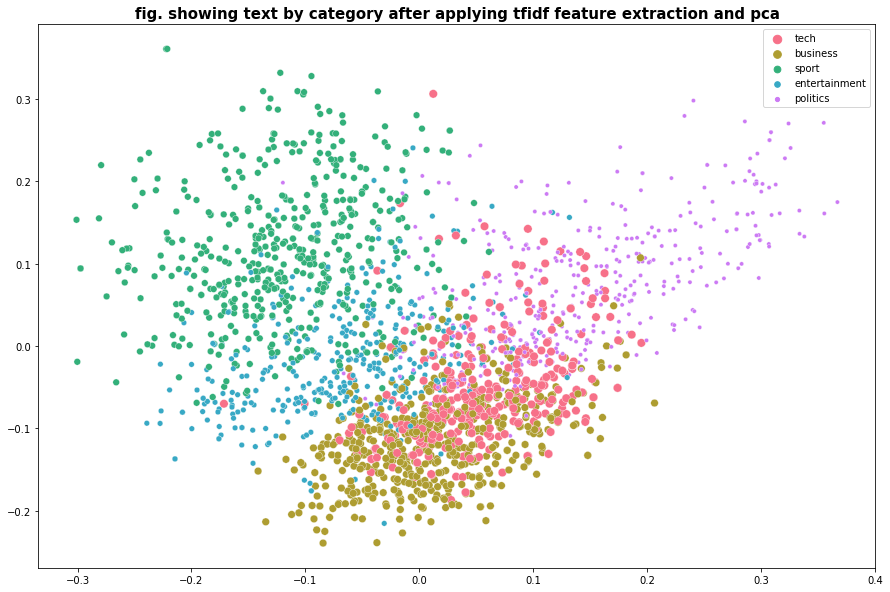

In [10]:
#plotting the extracted text
plt.figure(figsize=(15,10))
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data2D[:,0], data2D[:,1],
                hue=df['category'].tolist(),size=df['category'].tolist(),palette="husl");
plt.title('fig. showing text by category after applying tfidf feature extraction and pca',
          fontweight ="bold",fontsize=15);

## Models

### Kmean clustering

In [11]:
# model building
model_kmean=KMeans(n_clusters=5,max_iter=300,init='k-means++',n_init=50)
model_kmean.fit(train_feature)

KMeans(n_clusters=5, n_init=50)

In [12]:
# Creating copy of original dataframe to avoid confusion later and 
# assigning the cluster to the cody dataframe
df_copy=df.copy(deep=True)
df_copy['cluster']=model_kmean.labels_

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


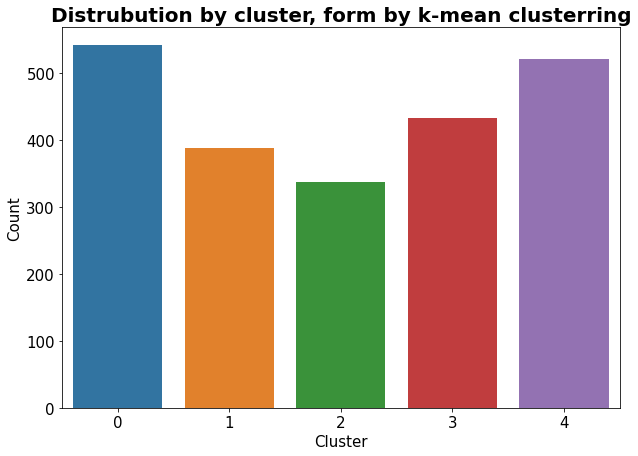

In [13]:
# plottng distribution by cluster form by kmean clusterring
plt.figure(figsize=(10,7))
fig=sns.countplot(df_copy['cluster'])
plt.title('Distrubution by cluster, form by k-mean clusterring',
          fontweight ="bold",fontsize=20);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
fig.set_xlabel('Cluster',fontsize=15);
fig.set_ylabel('Count',fontsize=15);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


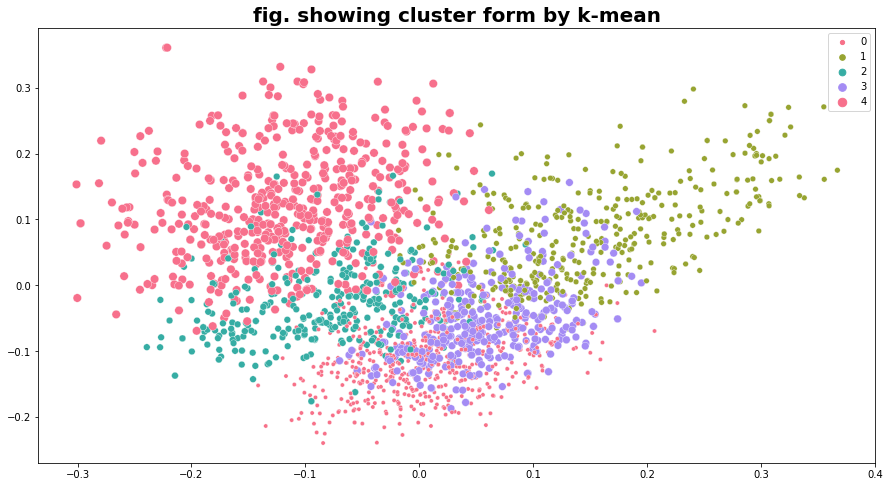

In [14]:
#plotinga kmean cluster
plt.figure(figsize=(15,8))
cmap =sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=df_copy['cluster'].tolist(),size=df_copy['cluster'].tolist(),palette='husl');
plt.title('fig. showing cluster form by k-mean',
          fontweight ="bold",fontsize=20);

#### Accuracy coefficient 

In [15]:
#accuracy parameter 
# silhouette score ranges from -1 to 1
# it should be greater than zero for good clustering2
silhouette_score(train_feature,model_kmean.labels_, metric='euclidean')

0.01218262272787882

In [16]:
# Compairing how cluster form with respect to given category
cross_tab_kmean=pd.crosstab(df_copy['category'],df_copy['cluster'])
print(cross_tab_kmean)

cluster          0    1    2    3    4
category                              
business       486   12    0   12    0
entertainment   18    6  331   18   13
politics        26  368    0   17    6
sport            6    1    3    2  499
tech             6    2    4  385    4


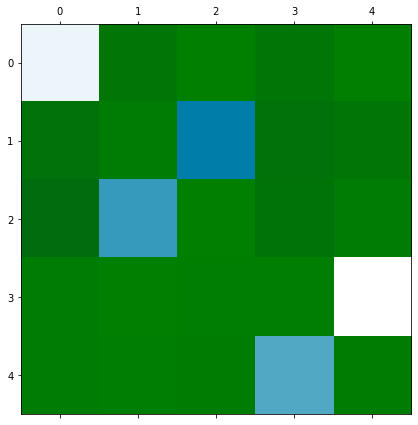

In [17]:
plt.figure(figsize=(10,7))
fig1=plt.matshow(cross_tab_kmean,cmap='ocean',fignum=1);

### Hierarchical Clustering

In [18]:
df_hierarchical=df.copy(deep=True)

In [19]:
#model building
clustering = AgglomerativeClustering(n_clusters = 5).fit(train_feature.toarray())

In [20]:
# Creating copy of original dataframe to avoid confusion later and 
# assigning the cluster to the cody dataframe
df_hierarchical=df.copy(deep=True)
df_hierarchical['cluster']=clustering.labels_

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


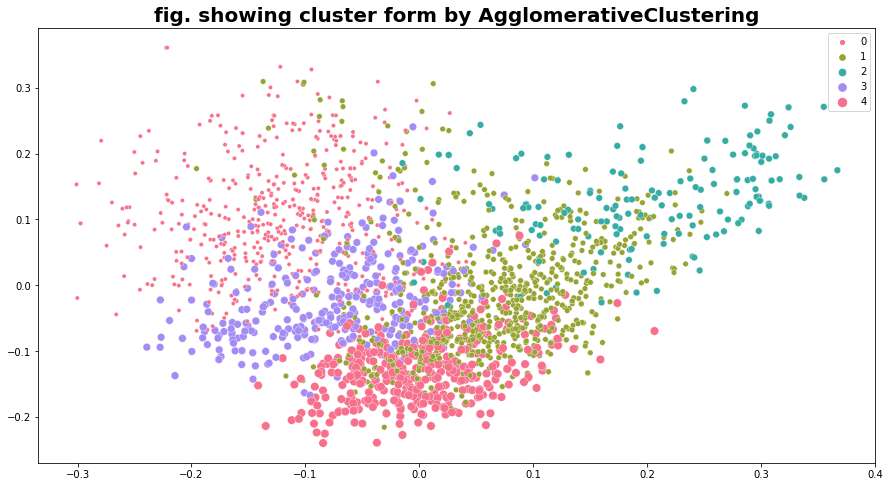

In [21]:
#plotinga kmean cluster
# data2D is the decompose(pca) extracted feature(tfidf)
plt.figure(figsize=(15,8))
cmap =sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=df_hierarchical['cluster'].tolist(),size=df_hierarchical['cluster'].tolist(),palette='husl');
plt.title('fig. showing cluster form by AgglomerativeClustering',
          fontweight ="bold",fontsize=20);

#### Accuracy Coefficient

In [22]:
silhouette_score(train_feature,clustering.labels_, metric='euclidean')

0.005284430086538659

In [23]:
# Compairing how cluster form with respect to given category
pd.crosstab(df_hierarchical['category'],df_hierarchical['cluster'])

cluster,0,1,2,3,4
category,,,,,
business,13,112,2,5,378
entertainment,21,52,0,307,6
politics,2,243,158,7,7
sport,464,42,0,5,0
tech,4,376,1,5,15


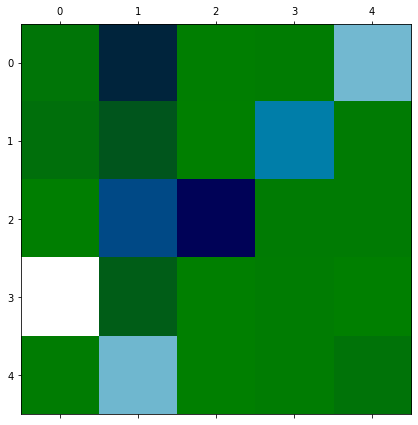

In [24]:
plt.figure(figsize=(10,7))
fig1=plt.matshow(pd.crosstab(df_hierarchical['category'],df_hierarchical['cluster']),cmap='ocean',fignum=1);